# กระบวนการทำ Data Analytic
0. จุดประสงค์ของการทำ Data Analytic คืออะไร
1. การเก็บข้อมูล/รวบรวมข้อมูลดิบ *
2. การตั้งคำถาม ตั้งสมมติฐาน 
3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
  - การเลือกข้อมูล
  - การจัดรูปแบบข้อมูล
  - การ clean ข้อมูล
4. การหาคำตอบจากข้อมูล ซึ่งอาจจะได้จากขั้นตอนที่ 3 หรือหา insight เพิ่มเติม
5. ระหว่างการหาคำตอบ จะมีคำถามใหม่เกิดขึ้นมา จนอาจจะนำมาสู่กระบวนการย้อนกลับไปสู่ขั้นตอน 1 หรือ 2
6. การสรุปผล 
** 1 กับ 2 อาจจะสลับกัน บางครั้งเราก็ตั้งคำถามก่อนรวมรวมข้อมูล

In [1]:
print("Hello World for DSE class 1")

Hello World for DSE class 1


In [2]:
# Install libraries
!pip install pygsheets
!pip install pythainlp

     |████████████████████████████████| 112kB 4.5MB/s 
     |████████████████████████████████| 13.1MB 302kB/s 
     |████████████████████████████████| 747kB 39.7MB/s 


In [3]:
#access boinoi google drive
!gdown --id 175HCEziwBcWBffjE9O50q4HivfB8DYE4 
!gdown --id 1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7
!gdown --id 14pjXRN_Y3Fmf5VKzMgu_ewReD82J1OKP

Downloading...
From: https://drive.google.com/uc?id=175HCEziwBcWBffjE9O50q4HivfB8DYE4
To: /content/botnoiw2v.py
100% 389/389 [00:00<00:00, 355kB/s]
Downloading...
From: https://drive.google.com/uc?id=1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7
To: /content/botnoiw2v_small.mod
19.0MB [00:00, 40.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=14pjXRN_Y3Fmf5VKzMgu_ewReD82J1OKP
To: /content/TH-Sarabun-New.zip
100% 415k/415k [00:00<00:00, 60.8MB/s]


#0. ตั้งจุดประสงค์ของการวิเคราะห์ข้อมูล
- เข้าใจคนที่เรียน จะได้สอนได้ตรงกับความต้องการ
- จัดแบ่งกลุ่มคนเรียน
- ดูเรื่องของการสมัคร จะได้ปรับปรุงคราวหน้า

# 1. การเก็บข้อมูล
ข้อมูลที่ได้ อาจจะมาจากหลายช่องทาง อาทิ การทำการสำรวจ ระบบการจอง ระบบการซื้อการขาย website แชทบอท social media เป็นต้น

ข้อมูลที่เรานำมาวิเคราะห์ในคลาสนี้ เป็นข้อมูลที่ผู้สมัครกรอกแบบสอบถามบน Google Sheet ซึ่งมีการบันทึกข้อมูลต่าง ๆ ดังต่อไปนี้
1. **Timestamp** เป็นข้อมูลวัน และ เวลาที่มีการกรอกแบบสอบถาม
2. **สะดวกเรียนช่วงเวลาไหน** ช่วงเวลาที่สะดวกเรียน
3. **อายุ** ช่วงอายุของผู้สมัคร
4. **อาชีพ** อาชีพของผู้สมัคร
5. **สถานที่ทำงาน/เรียน** บริษัท หรือ สถานศึกษา ของผู้สมัคร
6. **สาขาที่เรียนจบ / กำลังศึกษา** สาขาวิชาที่เรียนจบ หรือ สาชาวิชาที่กำลังศึกษาอยู่
7. **มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน** ความรู้ด้านการเขียนโปรแกรม
8. **ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา** เคยผ่านการอบรมกับทาง BOTNOI มาก่อนหรือไม่
9. **ทำไมถึงสนใจสมัครเรียน** เหตุผลที่ผู้สมัครสนใจลงเรียนคตลาสนี้
10. **ความคาดหวังจากการมาเรียน** สิ่งที่ผู้สมัครคาดหวัง เมื่อเรียนจบ
11. **กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน** ช่องทางที่ผู้สมัครทราบข่าวเกี่ยวกับคลาสเรียน เช่น Line, Facebook หรือ Twitter เป็นต้น
12. **ยืนยันลงทะเบียน** ผู้สมัครได้ทำการยืนยันการลงทะเบียนหรือไม่
13. **ชำระเงิน** สถานะการชำระเงินของผู้สมัคร

In [4]:
# โค้ดในส่วนของการเชื่อมต่อกับ google sheet
import pygsheets #read googlesheet
import google.auth
from google.colab import auth
import seaborn as sns
import warnings
import pandas as pd
# set maximum row to unlimit
pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')
auth.authenticate_user() #access google
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
url = 'https://docs.google.com/spreadsheets/d/126tAa47zI6eNwO5UJ3H6s8P-Y1p1wcg82Esiy01X5GY/edit?usp=sharing'
sheet = gc.open_by_url(url)
# Get data from google sheet
dat = sheet.sheet1.get_as_df()
dat.tail(10)

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,,ยืนยันลงทะเบียน,ชำระเงิน
738,8/3/2020 18:53:42,จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00,30 - 40 ปี,พยักงานบริษัมเอกชน,BEM,IT,มี แต่ไม่ได้เขียนมา 10 ปีแล้วครับ,,ต้องการนำมาใช้นองค์กร และให้ผู้บริการระดับสูงเ...,ใช้ในองค์กรได้,Email,,Uc9f95fab1ed3f869c5a0c9faaa55b155,None
739,8/3/2020 21:40:02,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,15 - 20 ปี,นักศึกษา,KMITL,Data Science and Business Analytics,เขียน Pythonได้นิดหน่อยครับ,,อยากเอาจริงเอาจังกับ data Science skills,อยากเป็น Data Science ที่ใช้งานได้ครับ,เพจพี่ทอย,,U245b874be8fa1b781e77bf3258b5aa79,1
740,8/3/2020 21:56:52,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,20 - 30 ปี,นักศึกษา,-,สถาบันเทคโนโลยีพระจอมเกล้าเจ้าคุณทหารลาดกระบัง,Python,,อยากเรียนรู้เกี่ยวกับวิธีการนำข้อมูลมาใช้ประโย...,นำทักษะที่ได้รับจากการเรียนไปพัฒนาตนเองและนำไป...,DataRockie,,U7445b94f8bb8acdf2e3472d22d0c023e,1
741,8/3/2020 22:00:38,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,ศิษย์การบิน,-,วิศวกรรมการบินและอวกาศ,ไม่มี,,สนใจย้ายสายงานมาทำสาย data science,ได้รับความรู้ และพัฒนาทักษะการเขียนโปรแกรม รวม...,DataRockie,,U3e90b394ccab733048241ace8d35c45d,1
742,8/3/2020 22:42:02,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,20 - 30 ปี,SAP Basis,I AM consulting,Computer Engineering,"เคยเขียน Python ,R , Java, SQL มาบ้างค่ะ",,อยากเรียนรู้ทักษะการวิเคราะห์ข้อมูล เพื่อ fore...,โอกาสในการทำงานสายนี้ต่อไปค่ะ,Datarockie,None,None,None
743,8/4/2020 0:21:04,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ แ...",30 - 40 ปี,พนักงานบริษัท,MTL,M. Sc. ITM & B. Sc. Mathematics,"Java, Python",,ได้เรียนกับผู้เชี่ยวชาญ,ประยุกต์ใช้ในงาน,Facebook,,U2af10f214c6c8bd24a3c7aac0fa2dee4,1
744,8/4/2020 8:34:23,จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00,30 - 40 ปี,ธุรกิจส่วนตัว,Yell Advertising,นิเท,ไม่มี,,ทำงานโฆษณา และคิดว่าเป็นสิ่งสำคัญที่นักโฆษณาต้...,เข้าใจภาพรวม และวามารถเชื่อมโยงกับการทำงานได้,DataRookies,,Ub6041da4d70bfbee87b84b76f53199b4,None
745,8/4/2020 9:24:08,"จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00, เสาร์ แ...",20 - 30 ปี,data analyse,kasset,economics,เล็กน้อย คือ python และ sql,,สนใจหัวข้อ customer segmentation เป็นพิเศษ,ต้องการรู้หัวข้อ customer segmentation,facebook,,Uf67eb01c415f460f1cb65c78d12f5a6a,1
746,8/4/2020 14:06:30,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,นักศึกษา,Chalmers university of technology,"Systems, Control and Mechatronics",Python,,สนใจ Data science,ได้Basic ที่จำเป็นสำหรับงาน DataScience,P'Win,None,None,None
747,8/4/2020 15:19:31,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,15 - 20 ปี,นักศึกษา,โทโฮคุ,วิศวกรรมการบิน,ถนัด python เคยเขียนในการทําโครงงานแต่ไม่เชี่ย...,,อยากพัฒนาตนเอง,สนุก ได้ทําจริง,เฟส,,Ue9a16c103e72b2ebe95aa972320c832e,1


In [ ]:
# แสดงหัวข้อทั้งหมดของฐานข้อมูล
dat.columns


Index(['Timestamp', 'สะดวกเรียนช่วงเวลาไหน', 'อายุ', 'อาชีพ',
       'สถานที่ทำงาน/เรียน ', 'สาขาที่เรียนจบ / กำลังศึกษา',
       'มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน',
       'ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา',
       'ทำไมถึงสนใจสมัครเรียน', 'ความคาดหวังจากการมาเรียน',
       'กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน', '',
       'ยืนยันลงทะเบียน', 'ชำระเงิน'],
      dtype='object')

In [ ]:
# เลือกเฉพาะผู้สมัครที่ชำระค่าลงทะเบียน
dat = dat[dat['ชำระเงิน']==1]

In [ ]:
# นับจำนวนทั้งหมด
len(dat)

411

In [ ]:
# ดูข้อมูลแค่ 5 บรรทัดแรก
dat.head()

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,,ยืนยันลงทะเบียน,ชำระเงิน
0,7/16/2020 14:11:33,"จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00, เสาร์ แ...",20 - 30 ปี,Web programmer,กำลังจะศึกษา ป โท ด้าน recommendation system,Computer engineering,C# html jquery javascript etc.,,ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendati...,ทำระบบ recommendation system ได้ และต่อยอดในด้...,,,Ud4eea8c87626fed0f82a01ccd738d5be,1
1,7/16/2020 14:14:51,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,40 ปี ขึ้นไป,IT System admin,Non-Corp,Electrical Engineer,"C , Python",Python Fundamental for Data Science module 1,สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้,ประยุกต์กับชีวิตและการทำงานได้ การตัดสินใจมีพื...,,,Ue3c819f721bf05b5d6dfbdebbcde1173,1
2,7/16/2020 14:30:50,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,นักศึกษา,จุฬาฯ,วิศวกรรมอุตสาหการ,python,,หาความรู้เพิ่มเติม,Case study / real world application,,,U1bc99db21c65b792d64d8f4d3545242b,1
3,7/16/2020 14:36:17,"จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00, จันทร์ ...",20 - 30 ปี,ว่างงาน (พักเบรก) แต่เคยทำงานในบริษัทวิจัยการตลาด,ว่างงาน (ที่ทำงานล่าสุด คือ CREAM Consulting),Master of Arts in Business and Managerial Econ...,Excel : การเขียนสูตรระดับน่าจะประมาณ Intermedi...,Python Fundamental for Data Science module 1,เราสนใจด้าน Behavioral Science ค่ะ \n\nเคยทำงา...,- เขียน Program ได้ดียิ่งขึ้น + รู้ว่า ณ Stage...,,,U74c91c5612f92779b894338553faced7,1
4,7/16/2020 14:50:25,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,30 - 40 ปี,ผู้ดูแลจัดการระบบโรงงาน,บริษัทแสงอินเตอร์ลามเนทจำกัด,Information and Communication Engineer,"มี Javascript, Python",,อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บ...,เข้าใจหลักการ Data science มากขึ้น คิด Analyti...,,,U0f486dda4e1d90b73ef233e186528ebe,1


# 2. การตั้งคำถาม ตั้งสมมติฐาน ตั้งเป้าหมายของการวิเคราะห์

2.1 ตั้งคำถาม
- เพื่อเตรียมตัวสอน สำหรับคนสอน
  - อยากรู้ว่า expectation ของผู้เรียนเป็นยังไง
  - อยากรู้ว่าทำไมถึงสนใจเรียน
  - อยากรู้พื้นฐานการเขียนโปรแกรม
  - อยากรู้ว่ากลุ่มอายุและเพศ
  - อยากรู้อาชีพ
  - อยากรู้สถานที่เรียน/ทำงาน

- เพื่อเข้าใจการสมัคร สำหรับฝั่ง marketing
  - อยากรู้ว่าสมัครช่องทางไหน
  - อยากรู้ว่ารู้ข่าวจากไหน
  - อยากรู้ช่วงเวลาที่สมัคร

2.2 ตั้งสมมติฐาน
- จะมีคนสมัครเป็นผู้หญิงประมาณ 30%
- มีกลุ่มคนสมัครเป็น เจ้าของธุรกิจ ผู้บริหาร พนักงานบริษัท นักศึกษา

2.3. ตั้งเป้าหมาย
- เพื่อจัดกลุ่มย่อย 20 กรุ๊ป โดยในแต่ละกรุ๊ปจะมีต้องมีความเท่าเทียม นั่นคือมีความหลากหลายของคนในกลุ่ม เช่น มีโปรแกรมเมอร์ มี business มี marketing มีนักศึกษา มีคนทำงาน

#3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
- เพื่อการวิเคราะห์เราต้องมีการจัดข้อมูลให้เหมาะสมสำหรับการนำมาวิเคราะห์

##3.1 ข้อมูลอายุ

In [ ]:
datage = dat[['อายุ']]
datage.head()

,อายุ
0,20 - 30 ปี
1,40 ปี ขึ้นไป
2,20 - 30 ปี
3,20 - 30 ปี
4,30 - 40 ปี


In [ ]:
datage['อายุ'].value_counts()

20 - 30 ปี      202
30 - 40 ปี      133
40 ปี ขึ้นไป     57
15 - 20 ปี       17
9                 1
65ปี              1
Name: อายุ, dtype: int64

In [ ]:
datage = datage.replace('20 - 30 ปี','20-30')
datage = datage.replace('30 - 40 ปี','30-40')
datage = datage.replace('40 ปี ขึ้นไป','>40')
datage = datage.replace('15 - 20 ปี','<20')
datage = datage.replace('65ปี','>40')
datage = datage.replace(9,'<20')
datage.head()

,อายุ
0,20-30
1,>40
2,20-30
3,20-30
4,30-40


In [ ]:
datage['อายุ'].value_counts()

20-30    202
30-40    133
>40       58
<20       18
Name: อายุ, dtype: int64

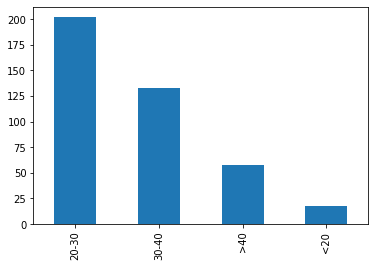

In [ ]:
datage['อายุ'].value_counts().plot.bar()

###สรุปเรื่องอายุ
- ถ้าตอนเก็บข้อมูลถามเป็นอายุ จะได้การวิเคราะห์ที่ดีกว่านี้
- การถามอายุอาจจะส่งผลไม่ดีต่อความรู้สึก อาจจะถามเป็น วันเดือนปีเกิด แทน
- สมมติฐานที่เกิดขึ้นระหว่างการดูข้อมูลคือ กลุ่ม 20-30 ปี เป็นกลุ่มนักศึกษา 30-40 ปี เป็นพนักงานออฟฟิส 40 ปีขึ้นไปเป็นผู้บริหาร

##3.2 ข้อมูลการเขียนโปรแกรม

In [ ]:
# แสดงข้อมูลของพื้นฐานการเขียนโปรแกรม
pskill = dat[['มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน']]
# กำหนดชื่อคอลัมน์
pskill.columns = ['programming']
pskill.head()

,programming
0,C# html jquery javascript etc.
1,"C , Python"
2,python
3,Excel : การเขียนสูตรระดับน่าจะประมาณ Intermedi...
4,"มี Javascript, Python"


- ข้อมูลเป็น free text ไม่ใช่เป็นหัวข้อ ดังนั้นเราต้องทำให้ข้อมูลเป็นหัวข้อ category หรือตัวเลข numeric เพื่อใช้ในการวิเคราะห์
- อยากแยกกลุ่มคนที่เขียนโปรแกรมได้ กับไม่ได้
- อยากได้ข้อมูลของคนที่เขียน Python ได้ เพราะเป็นภาษาหลัก
- อยากได้ข้อมูลของคนที่เขียน R ได้ เพราะเป็นอีกภาษาที่แสดงถึงว่า น่าจะมีพื้นฐานการวิเคราะห์
- อยากได้ข้อมูลของคนที่เขียน Go ได้ เพราะน่าจะเป็น hardcore
- อยากจัดระดับความสามารถ
- สำหรับคนที่เขียนโปรแกรมได้ อยากจะแยกกลุ่มเป็น fullstack frontend backend โดยดูจากภาษาที่ใช้


In [ ]:
# หาคนที่ไม่มีพื้นฐานการเขียนโปรแกรม โดยใช้สมมติฐานว่า มีค่าว่า 'ไม่มี'
noprogrammingskill = pskill['programming'].str.lower().str.contains('ไม่')
noprogrammingskill.sum()

85

In [ ]:
# คนที่เหลือคือมีพื้นฐานในการเขียนโปรแกรม
programmingskill = ~noprogrammingskill
programmingskill.sum()

326

In [ ]:
# หาคนที่มีพื้นฐานการเขียน Python โดยใช้สมมติฐานว่า มีคำว่า python อยู่
pythonskill = pskill['programming'].str.lower().str.contains('python')
pythonskill.sum()

201

In [ ]:
# สมมติฐานเขียนเยอะน่าจะเก่ง
lenskill = pskill['programming'].str.len()

In [ ]:
# ดูสมมติฐานเบื้องต้น แต่ผลลัพธ์ไม่ค่อยดี เพราะบางคนบรรยายเยอะ
plenskill = pskill.copy()
plenskill['lenskill'] = lenskill
plenskill = plenskill.sort_values(by='lenskill',ascending=False)
plenskill.head(10)

,programming,lenskill
3,Excel : การเขียนสูตรระดับน่าจะประมาณ Intermedi...,387
377,มีพื้นฐานการเขียนจากการเรียนในมหาวิทยาลัยอย่าง...,380
109,ภาษา C/C++ สามารถเขียนได้เบื้องต้น มีการใช้ในก...,371
54,"มีพื้นฐานมาบ้างในภาษา Python, C# และเขียนโปรแก...",343
388,เขียน Python ได้บ้าง และ Shell script ก็ได้อีก...,330
80,มีพื้นฐานการเขียนโปรแกรม Python และ R มาบ้างเล...,302
641,มีพื้นฐานการเขียน Python จากการศึกษาด้วยตนเอง ...,242
581,โปรเจคจบ : ระบบตัดแยกคำร้องอัตโนมัติเพื่องานสา...,180
123,สามารถเขียน python ได้ และมีประสบการณ์เรียน แล...,159
215,"VBA Excel, VB Express, Python 3 >>> เขียน scri...",153


In [ ]:
nplen = pskill['programming'].str.replace(',','').str.replace('#','').str.extract('([a-zA-Z ]+)')[0].str.lower().str.len()
npskill = pskill.copy()
npskill['nskill'] = nplen
npskill = npskill.fillna(0)
npskill.sort_values(by='nskill',ascending=False)

,programming,nskill
711,"R programming, rapidminer, basic python, basic...",63.0
506,Basic Python programming learning from university,49.0
672,"Python, Java, Go, Angular, JavaScript, C, etc.",39.0
378,"Python, Excel VBA, HTML, JavaScript",32.0
332,"C#, Javascript, Python, Labview, C++ ประสบการ...",29.0
0,C# html jquery javascript etc.,28.0
215,"VBA Excel, VB Express, Python 3 >>> เขียน scri...",28.0
207,"Java ,JavaScript ,php , html",26.0
27,"Java , Javascript , Python",25.0
468,Python for data analyst (1 year),24.0


In [ ]:
plist = pskill['programming'].str.replace(',','').str.replace('#','').str.extract('([a-zA-Z ]+)')[0].str.lower().values
plist

array(['c html jquery javascript etc', 'c  python', 'python', 'excel ',
       ' javascript python', 'python ', nan, 'python', 'python  ',
       'python ', ' python  ', 'pythonsql', 'java  php',
       'python objective c vuejs', 'python sql', 'python',
       ' advanced excel python ', 'python ', 'python ', nan,
       'java  javascript  python ', 'python', 'r sql', 'java ', 'python',
       'c', ' python ', ' python', 'python ', ' c ', nan,
       'matlab python ', 'python', ' rpython basic ', ' python', nan,
       'python pyspark sql shell', ' python c ', 'basic python', 'c',
       'lython', nan, 'php  javascript python ', 'python sql',
       'python  sql', ' ', ' htmlcss sql  python ', 'c java', 'js',
       'sql python r', ' python', ' php ', 'python', 'c ', 'python',
       ' python ', 'python ', 'python ', ' python r bash ', 'sql python ',
       'sql', ' python  sql and nosql ', ' abap', ' ', 'python', 'sql ',
       'sql r', 'r language sql ', ' nlp', 'python sql', 'python

In [ ]:
splist = []
for p in plist:
  splist = splist + str(p).strip().split(' ')
splist

['c',
 'html',
 'jquery',
 'javascript',
 'etc',
 'c',
 '',
 'python',
 'python',
 'excel',
 'javascript',
 'python',
 'python',
 'nan',
 'python',
 'python',
 'python',
 'python',
 'pythonsql',
 'java',
 '',
 'php',
 'python',
 'objective',
 'c',
 'vuejs',
 'python',
 'sql',
 'python',
 'advanced',
 'excel',
 'python',
 'python',
 'python',
 'nan',
 'java',
 '',
 'javascript',
 '',
 'python',
 'python',
 'r',
 'sql',
 'java',
 'python',
 'c',
 'python',
 'python',
 'python',
 'c',
 'nan',
 'matlab',
 'python',
 'python',
 'rpython',
 'basic',
 'python',
 'nan',
 'python',
 'pyspark',
 'sql',
 'shell',
 'python',
 'c',
 'basic',
 'python',
 'c',
 'lython',
 'nan',
 'php',
 '',
 'javascript',
 'python',
 'python',
 'sql',
 'python',
 '',
 'sql',
 '',
 'htmlcss',
 'sql',
 '',
 'python',
 'c',
 'java',
 'js',
 'sql',
 'python',
 'r',
 'python',
 'php',
 'python',
 'c',
 'python',
 'python',
 'python',
 'python',
 'python',
 'r',
 'bash',
 'sql',
 'python',
 'sql',
 'python',
 '',
 'sql',


In [ ]:
#count ซ้ำ
from collections import Counter, OrderedDict
pdict=Counter(splist)
OrderedDict(pdict.most_common())

OrderedDict([('python', 155),
             ('c', 72),
             ('nan', 72),
             ('sql', 50),
             ('', 49),
             ('java', 28),
             ('r', 22),
             ('php', 20),
             ('javascript', 17),
             ('vb', 15),
             ('basic', 14),
             ('html', 11),
             ('vba', 8),
             ('no', 7),
             ('excel', 6),
             ('js', 5),
             ('programming', 4),
             ('and', 3),
             ('nodejs', 3),
             ('none', 3),
             ('beginner', 3),
             ('css', 3),
             ('stata', 3),
             ('etc', 2),
             ('matlab', 2),
             ('shell', 2),
             ('abap', 2),
             ('language', 2),
             ('sas', 2),
             ('script', 2),
             ('visual', 2),
             ('node', 2),
             ('based', 2),
             ('learning', 2),
             ('of', 2),
             ('jquery', 1),
             ('pythonsql', 1),
    

In [ ]:
#classified by specialization
frontendproglist = ['javascript','vuejs','nodejs','html','js','jquery','web','angular','react','css','htmlcss','php']
backendproglist = ['python','go','c','java']
dataproglist = ['r','cognos','sql','vba','matlab','pyspark','rapidminer']
pythonproglist = ['python']

In [ ]:
#make list into set to use intersect
spu = set(plist[0].split(' '))
spu

{'c', 'etc', 'html', 'javascript', 'jquery'}

In [ ]:
spu.intersection(frontendproglist)

{'html', 'javascript', 'jquery'}

In [ ]:
len(spu.intersection(frontendproglist))

3

In [ ]:
#function loop check specialization
def getprogprofile(plist):
  frontendproglist = ['javascript','vuejs','nodejs','html','js','jquery','web','angular','react','css','htmlcss','php']
  backendproglist = ['python','go','c','java']
  dataproglist = ['r','cognos','sql','vba','matlab','pyspark','rapidminer',"excel"]
  pythonproglist = ['python']
  pprofile = []
  for p in plist:
    spu = set(str(p).split(' '))
    fp = len(spu.intersection(frontendproglist))
    bp = len(spu.intersection(backendproglist))
    dp = len(spu.intersection(dataproglist))
    pp = len(spu.intersection(pythonproglist))
    pprofile.append([fp,bp,dp,pp])
  return pprofile

In [ ]:
pprofile = getprogprofile(plist)
pprofile = pd.DataFrame(data=pprofile,columns=['frontend','backend','data','python'])
pprofile.head(10)

,frontend,backend,data,python
0,3,1,0,0
1,0,2,0,1
2,0,1,0,1
3,0,0,1,0
4,1,1,0,1
5,0,1,0,1
6,0,0,0,0
7,0,1,0,1
8,0,1,0,1
9,0,1,0,1


In [ ]:
# แบ่ง cluster ของกลุ่มความสามารถในการเขียนโปรแกรม ด้วย K-means
from sklearn.cluster import KMeans #use for แบ่งกลุ่ม
clus = KMeans(n_clusters=6, random_state=0).fit_predict(pprofile) #non,full,front,back,data
pprofile['prog_clus'] = clus
pprofile

,frontend,backend,data,python,prog_clus
0,3,1,0,0,2
1,0,2,0,1,1
2,0,1,0,1,1
3,0,0,1,0,5
4,1,1,0,1,1
5,0,1,0,1,1
6,0,0,0,0,0
7,0,1,0,1,1
8,0,1,0,1,1
9,0,1,0,1,1


In [ ]:
#don't know what each number mean, so we check by stat
pprofile.groupby(by='prog_clus').mean()

,frontend,backend,data,python
prog_clus,,,,
0,0.053691,0.000000,0.000000,0.000000
1,0.085470,1.170940,0.000000,1.000000
2,2.461538,0.923077,0.076923,0.307692
3,0.120690,1.068966,0.034483,0.000000
4,0.176471,1.088235,1.205882,1.000000
5,0.050000,0.000000,1.175000,0.000000


In [ ]:
pprofile['prog_clus'] = pprofile['prog_clus'].replace(0,'p_noskill')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(1,'p_python')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(2,'p_frontend')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(3,'p_backand')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(4,'p_fullstack')
pprofile['prog_clus'] = pprofile['prog_clus'].replace(5,'p_data')
pprofile

,frontend,backend,data,python,prog_clus
0,3,1,0,0,p_frontend
1,0,2,0,1,p_python
2,0,1,0,1,p_python
3,0,0,1,0,p_data
4,1,1,0,1,p_python
5,0,1,0,1,p_python
6,0,0,0,0,p_noskill
7,0,1,0,1,p_python
8,0,1,0,1,p_python
9,0,1,0,1,p_python


In [ ]:
pprofile['prog_clus'].value_counts()

p_noskill      149
p_python       117
p_backand       58
p_data          40
p_fullstack     34
p_frontend      13
Name: prog_clus, dtype: int64

In [ ]:
#plenskill[plenskill.index()pprofile["prog_clus"]=="p_noskill"]

IndexingError: ignored

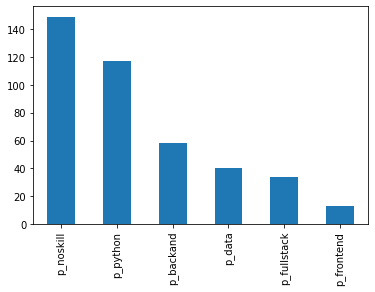

In [ ]:
pprofile['prog_clus'].value_counts().plot.bar()

###สรุปเรื่อง programming
- มีกลุ่มคนที่ไม่มีพื้นฐานการเขียนโปรแกรม
- มีกลุ่มคนที่มีพื้นฐานการเขียน python
- พอจะสรุปได้หรือเปล่าว่า python เป็นภาษายอดนิยมสำหรับคนที่สนใจ data science หรือเกิดจาก bias เพราะเราสอนโดยใช้ colab

##3.3 ความคาดหวัง



In [ ]:
# ดึงข้อมูลเกี่ยวกับความคาดหวังที่นักเรียนกรอกในแบบสอบถาม
expec = dat[['ความคาดหวังจากการมาเรียน']]

In [ ]:
import botnoiw2v as bw
import numpy as np
expecDat = np.vstack([bw.sentencevector(e) for e in expec['ความคาดหวังจากการมาเรียน'].values])
expecDat

array([[-1.24956322,  0.15185937, -0.00411755, ..., -0.21486473,
        -0.162743  ,  0.4160614 ],
       [-1.52432668,  0.46932563,  0.41572517, ..., -0.26738614,
        -0.68045902,  0.67800194],
       [ 0.13168415, -1.91579318,  0.23483583, ...,  0.50775236,
         0.78831053, -0.15640858],
       ...,
       [-2.80801392,  0.00808907,  1.45312655, ..., -1.51801467,
         2.35133362, -0.85632467],
       [-2.39968252, -0.44642878,  0.89457113, ...,  0.30973521,
        -1.73977685,  0.86982667],
       [-0.58417296,  0.51354694, -0.30058968, ..., -0.49975133,
        -1.40301585, -0.67914599]])

In [ ]:
# แบ่งกลุ่มความคาดหวังด้วย K-means
eclus = KMeans(n_clusters=4, random_state=0).fit_predict(expecDat)
expec['eclus'] = eclus
expec

,ความคาดหวังจากการมาเรียน,eclus
0,ทำระบบ recommendation system ได้ และต่อยอดในด้...,1
1,ประยุกต์กับชีวิตและการทำงานได้ การตัดสินใจมีพื...,0
2,Case study / real world application,3
3,- เขียน Program ได้ดียิ่งขึ้น + รู้ว่า ณ Stage...,1
4,เข้าใจหลักการ Data science มากขึ้น คิด Analyti...,2
5,ได้ประสบการณ์ใหม่ๆและได้ลองทำงานจริง,2
6,สามารถนำความรู้มาพัฒนาการทำงานได้,0
7,สามารถนำไปใช้งานจริงได้,2
8,ได้รับความรู้เพิ่มเติมและได้ลองปฏิบัติจริง,0
9,มีความมั่นใจในการลงมือทำ machine learning proj...,1


In [ ]:
#ไม่รู้ว่ามันใช้อะไรเป็นเกณฑ์แบ่ง ก็นั่งอ่านเองไปเลย
# แสดงข้อความใน cluster = 0
expec[expec['eclus']==0]

,ความคาดหวังจากการมาเรียน,eclus
1,ประยุกต์กับชีวิตและการทำงานได้ การตัดสินใจมีพื...,0
6,สามารถนำความรู้มาพัฒนาการทำงานได้,0
8,ได้รับความรู้เพิ่มเติมและได้ลองปฏิบัติจริง,0
15,สามารถนำความรู้ที่ได้รับไปใช้ในงานและโครงการได้,0
16,สามารถนำไปประยุกต์ในงานต่างๆได้,0
21,สามารถเข้าใจ concept และสามารถนำมาประยุกต์ในงา...,0
22,สามารถนำมาประยุกต์ใช้ได้,0
30,ได้ความรู้เพิ่มเติมจากองค์ความรู้เดิม,0
31,ได้ความรู้มากขึ้น,0
36,ได้รับความรู้ที่ใช้งานได้จริง ได้รับคำแนะนำจาก...,0


In [ ]:
# แสดงข้อความใน cluster = 1
expec[expec['eclus']==1]

,ความคาดหวังจากการมาเรียน,eclus
0,ทำระบบ recommendation system ได้ และต่อยอดในด้...,1
3,- เขียน Program ได้ดียิ่งขึ้น + รู้ว่า ณ Stage...,1
9,มีความมั่นใจในการลงมือทำ machine learning proj...,1
13,อยากได้ guideline การทำงานแบบมืออาชีพ การทำงา...,1
14,นำความรู้ที่ได้ไปต่อยอดสรุปและค้นหา paper เกี่...,1
20,ต้องการนำความรู้ที่ได้มาพัฒนาส่วนต่างๆ ตามที่ไ...,1
29,สมารถใช้python ได้พอๆกับ R เพื่อที่จะได้เข้าใจ...,1
33,คาดหวังจะนำความรู้ด้าน AI และ ML ไปช่วยงานในทีม,1
43,อยากลงมือทำโปรเจ็คเล็กๆ และ ได้เข้ามาในคอมมูนิ...,1
44,ไดรับความรู้จากประสบการณ์จริงของทีมงาน BOTNOI,1


In [ ]:
# แสดงข้อความใน cluster = 2
expec[expec['eclus']==2]

,ความคาดหวังจากการมาเรียน,eclus
4,เข้าใจหลักการ Data science มากขึ้น คิด Analyti...,2
5,ได้ประสบการณ์ใหม่ๆและได้ลองทำงานจริง,2
7,สามารถนำไปใช้งานจริงได้,2
17,อยากเรียนรู้เกี่ยวกับ Concept เพื่อเป็นพื้นฐาน...,2
18,สามารถทำโปรเจคเองแบบ mini ได้,2
23,สามารถต่อยอดเพื่อทำ portfolio\nละนำไปสมัครงานได้,2
27,ได้พัฒนาทักษะและความรู้ไปถึงระดับทำงานจริงได้ครับ,2
28,เนื่องจากเป็นการดำเนินการเรียนการสอนผ่านผู้มีป...,2
32,นำไปประยุกตืใช้งานได้,2
35,คาดหวังในการนำความรู้ไปใช้ทำงานได้จริง,2


In [ ]:
# แสดงข้อความใน cluster = 3
expec[expec['eclus']==3]

,ความคาดหวังจากการมาเรียน,eclus
2,Case study / real world application,3
71,"ai,machine",3
103,Able to apply in real applications,3
125,"Connection,experience",3
131,broaden the scope of the knowledge and data an...,3
134,Actually I'm unemployment that there is some o...,3
147,Cover all the basics to build on in the future,3
219,ต่อยอดจาก data engineer,3
228,Up skill.,3
288,understand the concept and can apply the knowl...,3


In [ ]:
#'expect_apply','expect_experience','expect_concept','expect_english'
expec['eclus'] = expec['eclus'].replace(0,'expect_apply')
expec['eclus'] = expec['eclus'].replace(1,'expect_experience')
expec['eclus'] = expec['eclus'].replace(2,'expect_concept')
expec['eclus'] = expec['eclus'].replace(3,'expect_english')
expec

,index,ความคาดหวังจากการมาเรียน,eclus
0,0,ทำระบบ recommendation system ได้ และต่อยอดในด้...,expect_experience
1,1,ประยุกต์กับชีวิตและการทำงานได้ การตัดสินใจมีพื...,expect_apply
2,2,Case study / real world application,expect_english
3,3,- เขียน Program ได้ดียิ่งขึ้น + รู้ว่า ณ Stage...,expect_experience
4,4,เข้าใจหลักการ Data science มากขึ้น คิด Analyti...,expect_concept
5,5,ได้ประสบการณ์ใหม่ๆและได้ลองทำงานจริง,expect_concept
6,6,สามารถนำความรู้มาพัฒนาการทำงานได้,expect_apply
7,7,สามารถนำไปใช้งานจริงได้,expect_concept
8,8,ได้รับความรู้เพิ่มเติมและได้ลองปฏิบัติจริง,expect_apply
9,9,มีความมั่นใจในการลงมือทำ machine learning proj...,expect_experience


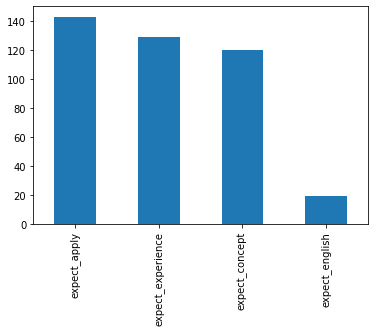

In [ ]:
expec['eclus'].value_counts().plot.bar()

###สรุปเรื่อง ความคาดหวัง
- แบ่งเป็น 3 กลุ่ม 
1.   กลุ่มที่อยากประยุกต์ใช้งาน คาดว่าน่าจะเป็น programmer หรืออยู่สาย data
2.   กลุ่มที่อยากฟังประสบการณ์ คาดว่าน่าจะเป็น data analyst/scientist ที่อยากฟังประสบการณ์เพื่อให้เก่งขึ้น
3.   กลุ่มที่อยากได้ concept คาดว่าน่าจะเป็นบุคคลทั่วไปที่สนใจ อาจจะเป็นนักศึกษา หรือผู้บริหาร ที่อยากเข้าใจว่า data science คืออะไร

In [ ]:
# แปลง cluster ให้เป็น One-hot
expectdf = pd.get_dummies(expec['eclus'])
expectdf.columns = ['expect_apply','expect_experience','expect_concept','expect_english']
expectdf.describe()

,expect_apply,expect_experience,expect_concept,expect_english
count,411.000000,411.000000,411.000000,411.000000
mean,0.347932,0.291971,0.046229,0.313869
std,0.476895,0.455223,0.210236,0.464629
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


##3.4 ทำไมถึงมาเรียน

In [ ]:
studyreason = dat[['ทำไมถึงสนใจสมัครเรียน']]
studyreason

,ทำไมถึงสนใจสมัครเรียน
0,ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendati...
1,สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้
2,หาความรู้เพิ่มเติม
3,เราสนใจด้าน Behavioral Science ค่ะ \n\nเคยทำงา...
4,อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บ...
5,สนใจDatascience อยากฝึกฝนตัวเองมาขึ้น อยากได้ล...
6,พัฒนาการทำงาน
7,สนใจการทำsegmentation
8,มีความสนใจในเรื่องของสถิติและ data science และ...
9,เดิมพอจะมีพื้นฐานด้านสถิติ และทฤษฎีด้าน machin...


In [ ]:
from sklearn.preprocessing import normalize
reasonDat = np.vstack([bw.sentencevector(s) for s in studyreason['ทำไมถึงสนใจสมัครเรียน'].values])
reasonDat

array([[-8.36640000e-01,  7.39858001e-02,  2.16045260e-01, ...,
        -3.53679001e-01, -1.11407585e-01,  3.72501582e-01],
       [-1.14248157e+00,  6.12293005e-01, -7.17101336e-01, ...,
         7.78281808e-01, -1.47446215e+00,  5.99136710e-01],
       [-2.69130081e-01,  1.03678143e+00,  1.64921856e+00, ...,
        -1.74827850e+00, -1.32029092e+00, -5.68063676e-01],
       ...,
       [-9.82845664e-01,  4.21491116e-01, -1.51480138e-02, ...,
         2.30446458e-03, -2.54652405e+00, -2.82438827e+00],
       [-7.72792041e-01, -1.07936883e+00, -1.67010725e-01, ...,
        -3.67143720e-01, -9.06369314e-02,  2.20662832e-01],
       [-2.02941322e+00,  2.12930417e+00, -2.43280530e-01, ...,
         8.29178154e-01, -1.76816213e+00, -6.68325648e-02]])

In [ ]:
rclus = KMeans(n_clusters=3, random_state=0).fit_predict(reasonDat)
studyreason['rclus'] = rclus
studyreason

,ทำไมถึงสนใจสมัครเรียน,rclus
0,ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendati...,0
1,สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้,1
2,หาความรู้เพิ่มเติม,2
3,เราสนใจด้าน Behavioral Science ค่ะ \n\nเคยทำงา...,0
4,อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บ...,1
5,สนใจDatascience อยากฝึกฝนตัวเองมาขึ้น อยากได้ล...,1
6,พัฒนาการทำงาน,2
7,สนใจการทำsegmentation,2
8,มีความสนใจในเรื่องของสถิติและ data science และ...,2
9,เดิมพอจะมีพื้นฐานด้านสถิติ และทฤษฎีด้าน machin...,2


In [ ]:
studyreason[studyreason['rclus']==0]['ทำไมถึงสนใจสมัครเรียน'].values

array(['ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendation system',
       'เราสนใจด้าน Behavioral Science ค่ะ \n\nเคยทำงานด้าน Market Research มาประมาณ  6-7 ปี ซึ่งเป็นการอยู่กับข้อมูลที่เก็บจากแบบสอบถาม ไม่ใช้ข้อมูลจริง\n\nอยากเปลี่ยนสายงานมาทาง Data Analyst หรือ Data Science มากขึ้น เพราะอยากลองทำงานกับ Data จริงมากขึ้น',
       'เอามาสร้าง web app ด้วย python',
       'ส่วนตัวผม สนใจ อยากมีความรู้ความสามารถ ด้าน Data Analytic / DataScience และถ้ามีโอกาสอยากพัฒนา เป็น Data Engineer',
       'ต้องการเปลี่ยนเป็นสาย Data เต็มตัว', 'data scients',
       'ต้องการทำงานสาย Data Science เป็น AI/Machine Learning Engineer',
       'ตัวผมสนใจด้าน data science ต้องการเข้าใจหลักการและวิธีการของ data science โดยเฉพาะการ predictive model และ trend forecasting รวมถึงการ case study อื่นๆ เพื่อนำไปประยุกต์ใช้กับงาน รวมถึงต้องการศึกษาศาสตร์ด้าน data science ให้เจาะลึกมากกว่าเดิม\nการเรียนกับ botnoi สามารถให้ทั้งความรู้ การฝึกปฎิบัติ และการอธิบายให้เห็นภาพได้ จากลง basic python (module 1) แล้วรู้สึกประท

In [ ]:
studyreason[studyreason['rclus']==1]['ทำไมถึงสนใจสมัครเรียน'].values

array(['สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้',
       'อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บมาผ่าน Webservice ว่าเอาไปวิเคราะห์อะไรได้บ้าง',
       'สนใจDatascience อยากฝึกฝนตัวเองมาขึ้น อยากได้ลองร่วมทำงานกับพี่ๆที่ทำงานจริงค่ะ',
       'สนใจสมัครเรียนbotnoi classตั้งแต่มีการเริ่มสอนแต่ไม่สะดวกในการไปเรียนสดที่ตึก  พอดีการสอนผ่านdiscordเลยตั้งใจจะเรียนครับ  งานในปัจจุบันย้ายสายจากคณิตศาสตร์ประกันภัย มาเป็นการทำงารวิเคราะห์ข้อมูลรวมถึงdata scienceครับ  เพราะได้ลองทำแล้วสนุก  รู้สึกสนใจเพิ่มเติม ตอนนี้เรียนผ่าน udemy กับ datacampอยู่ครับ   กำลังวางแผนจะศึกษาป.โทด้านนี้ด้วยครับ เลยอยากได้พื้นฐานที่แน่นขึ้นครับ',
       'มีความสนใจและอยากทำงาน Data Science จึงอยากสมัครเรียนเพื่อที่จะได้เรียนรู้เกี่ยวกับสิ่งเหล่านี้ ก่อนหน้านี้เคยเรียนมา 1 คลาสและต้องการพัฒนาความรู้ตรงนั้นต่อไปเพื่อเป็นการต่อยอดของสิ่งที่เราได้เคยเรียนรู้ไปแล้วครับ',
       'ต้องการพัฒนาตัวเอง',
       'พยายามเริ่มต้น สายงานอาชีพใหม่ และอยากเรียนรู้เรื่อง data มากขึ้น',
       'อยากมีพื้นฐานด้านData scienceที

In [ ]:
studyreason[studyreason['rclus']==2]['ทำไมถึงสนใจสมัครเรียน'].values

array(['หาความรู้เพิ่มเติม', 'พัฒนาการทำงาน', 'สนใจการทำsegmentation',
       'มีความสนใจในเรื่องของสถิติและ data science และได้ลองศึกษาจากการเรียนผ่านสื่อออนไลน์แล้วรู้สึกว่าเป็นงานที่น่าสนใจ จึงอยากเรียนรู้เพิ่มเติมกับทาง BOTNOI เพราะต้องการเรียนกับผู้ที่มีประสบการณ์ทำงานในประเทศและลองปฏิบัติจริงเพื่อให้สิ่งที่เรียนมาเป็นรูปธรรมมากขึ้นและเป็นแนวทางในการเลือกสายงานหลังเรียนจบ',
       'เดิมพอจะมีพื้นฐานด้านสถิติ และทฤษฎีด้าน machine learning บ้างแล้ว แต่ไม่ค่อยได้ทำProject เนื่องจากไม่ค่อยมั่นใจในขั้นตอน หรือการเลือกใช้เครื่องมือที่เหมาะสม',
       'เห็นประกาศคอร์สสอนเกี่ยวกัย data science ของ botnoi มาหลายครั้งและ botnoi ก็ให้โอกาสนักเรียนในทุกระดับช้ันมาเข้าศึกษาได้ จึงสนใจที่จะลองสมัครเรียนดูสักครั้ง เนื่องจากไม่มีประสบการณ์การทำงานทางด้าน data มาก่อนจึงอยากจะศึกษาหาความรู้เพิ่มเติมทางด้าน data anlytics จากนอกมหาวิทยาลัยเพื่อค้นหามุมมองใหม่ๆและการประยุกต์ใช้ใน business จริงๆ แล้วนำความรู้ที่ได้ไปต่อยอดคิด idea ใหม่เพื่อค้นหาแนวทางในการทำ IS หรือค้นหางานในอนาคตในสายงาน data ',
     

In [ ]:
studyreason['rclus'] = studyreason['rclus'].replace(0,'reason_interested')
studyreason['rclus'] = studyreason['rclus'].replace(1,'reason_extend')
studyreason['rclus'] = studyreason['rclus'].replace(2,'reason_motivated')
studyreason

,ทำไมถึงสนใจสมัครเรียน,rclus
0,ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendati...,reason_interested
1,สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้,reason_extend
2,หาความรู้เพิ่มเติม,reason_motivated
3,เราสนใจด้าน Behavioral Science ค่ะ \n\nเคยทำงา...,reason_interested
4,อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บ...,reason_extend
5,สนใจDatascience อยากฝึกฝนตัวเองมาขึ้น อยากได้ล...,reason_extend
6,พัฒนาการทำงาน,reason_motivated
7,สนใจการทำsegmentation,reason_motivated
8,มีความสนใจในเรื่องของสถิติและ data science และ...,reason_motivated
9,เดิมพอจะมีพื้นฐานด้านสถิติ และทฤษฎีด้าน machin...,reason_motivated


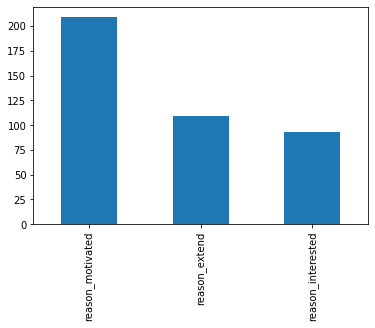

In [ ]:
studyreason['rclus'].value_counts().plot.bar()

###สรุปเรื่อง ความเหตุผลที่อยากเรียน
- แบ่งเป็น 3 กลุ่ม 
1.   กลุ่มที่มีความมุ่งมั่น 
2.   กลุ่มที่อยากจะเพิ่มความรู้ 
3.   กลุ่มที่สนใจ

##3.5 สถานที่เรียน/ทำงาน

In [ ]:
!unzip TH-Sarabun-New.zip

Archive:  TH-Sarabun-New.zip
replace THSarabunNew Bold.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: THSarabunNew Bold.ttf   
replace THSarabunNew BoldItalic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: THSarabunNew BoldItalic.ttf  
replace THSarabunNew Italic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: THSarabunNew Italic.ttf  
replace THSarabunNew.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: THSarabunNew.ttf        


In [ ]:
from wordcloud import WordCloud
from collections import Counter

path = '/content/THSarabunNew.ttf'
textList = dat['สถานที่ทำงาน/เรียน '].values
textList = [t.replace('\u200b','') for t in textList]
word_cloud_dict=Counter(textList)
word_cloud_dict

Counter({' ศูนย์ AIS ประจำจังหวัดนครววรรค์': 1,
         '-': 7,
         '14/95 ถ.ราษฎร์พัฒนา ซอย 13 เขตสะพานสูง กทม 10240': 1,
         'AA': 1,
         'AGC chemicals': 1,
         'AIResearch': 1,
         'AIS': 1,
         'AIS ภาคตะวันออก': 1,
         'Abac': 1,
         'Advanced Info Services': 1,
         'Agoda': 1,
         'Agoda Service Ltd.': 1,
         'Allianz tech ': 1,
         'Appsynth': 1,
         'Ark insight': 1,
         'Ark-insights': 1,
         'Asian Institute of Technology': 1,
         'Asiasoft': 1,
         'Asset World Corp Public Company Limited': 1,
         'Atcetera Corp.,Ltd': 1,
         'Bang Trading 1992 Co.,Ltd.': 1,
         'Bangkok Bank': 1,
         'Bangkok Industrial Gas Co.,Ltd.': 1,
         'Bangkok bank': 1,
         'Banpu': 1,
         'Beijing Language and Culture University': 1,
         'Bkk residence': 1,
         'BlueOneTech': 1,
         'Botnoi': 2,
         'Botnoi Consulting': 1,
         'Botnoi Consulting Co., Ltd.

In [ ]:
word_cloud_dict

Counter({' ศูนย์ AIS ประจำจังหวัดนครววรรค์': 1,
         '-': 7,
         '14/95 ถ.ราษฎร์พัฒนา ซอย 13 เขตสะพานสูง กทม 10240': 1,
         'AA': 1,
         'AGC chemicals': 1,
         'AIResearch': 1,
         'AIS': 1,
         'AIS ภาคตะวันออก': 1,
         'Abac': 1,
         'Advanced Info Services': 1,
         'Agoda': 1,
         'Agoda Service Ltd.': 1,
         'Allianz tech ': 1,
         'Appsynth': 1,
         'Ark insight': 1,
         'Ark-insights': 1,
         'Asian Institute of Technology': 1,
         'Asiasoft': 1,
         'Asset World Corp Public Company Limited': 1,
         'Atcetera Corp.,Ltd': 1,
         'Bang Trading 1992 Co.,Ltd.': 1,
         'Bangkok Bank': 1,
         'Bangkok Industrial Gas Co.,Ltd.': 1,
         'Bangkok bank': 1,
         'Banpu': 1,
         'Beijing Language and Culture University': 1,
         'Bkk residence': 1,
         'BlueOneTech': 1,
         'Botnoi': 2,
         'Botnoi Consulting': 1,
         'Botnoi Consulting Co., Ltd.

In [ ]:
def genwordcloud(word_cloud_dict,regexp):
  wordcloud = WordCloud(
                        font_path=path, 
                        relative_scaling = 0.3,
                        min_font_size=1,
                        background_color="white",
                        width=1024,
                        height=768,
                        max_words=2000, 
                        colormap='plasma', 
                        scale=3,
                        font_step=4,
                        regexp=regexp,
                      #   contour_width=3, 
                      #   contour_color='steelblue', 
                        collocations=False,
                        margin=2
                        ).generate_from_frequencies(word_cloud_dict)
  import pylab as plt
  fig, ax = plt.subplots(1, 1, figsize=(16, 12))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  fig.show()

In [ ]:
def remove_key(word_cloud_dict,keyList):
  wcd = word_cloud_dict.copy()
  kw = list(wcd.keys())
  for w in kw:
    for s in sList: 
      if (w.find(s)!=-1):
        try:
          wcd.pop(w)
        except:
          pass
  return wcd



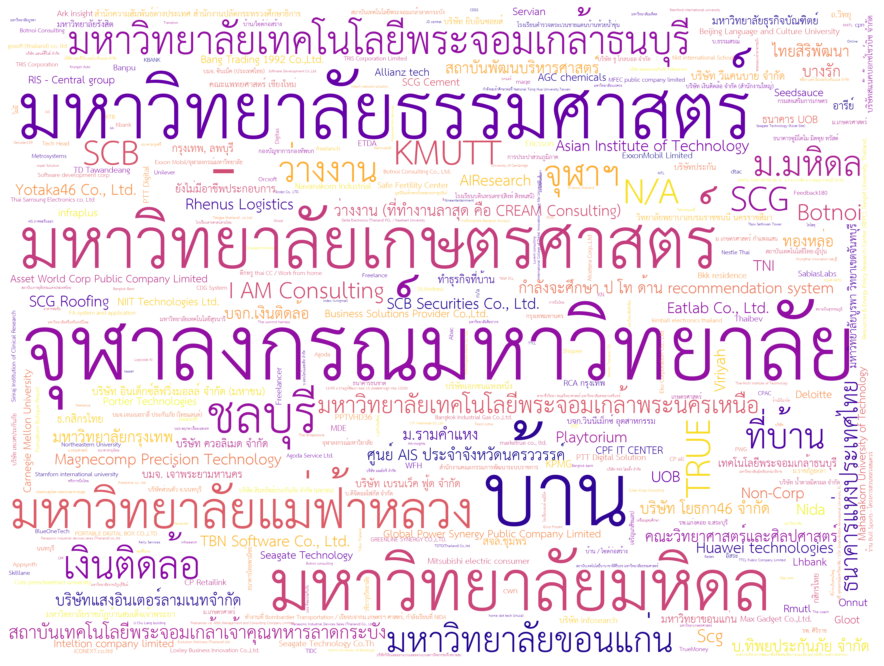

In [ ]:
regexp=r"\w[\w' ]+"
genwordcloud(word_cloud_dict,regexp)

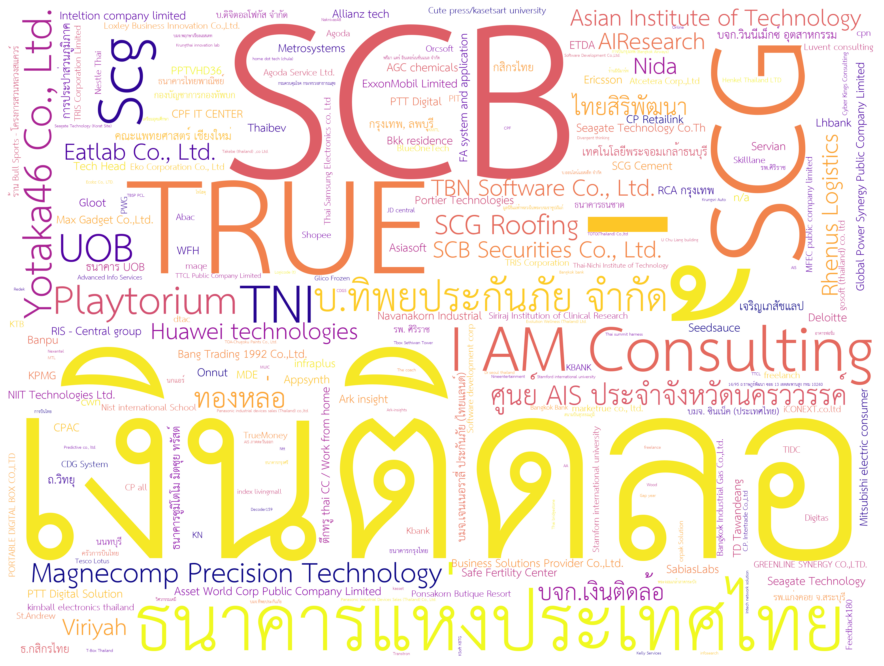

In [ ]:
#เอาพวกมหาลัยออก จะได้เห็นคนจากบบริษัทได้ใหญ่ขึ้น
sList = ['ชลบุรี','ม.','มหา','เกษตร','จุฬา','อารี','ศิลป','บาง','สุขุม','Free','คลอง','สจล','Rmu','กำลัง','Non','บอทน้อย','N/A','Botnoi','ไม่','บริษัท','สถาบัน','Uni','KMUTT','อิสระ','บ้าน','งาน','เรียน','FREE','ธรรม','วิทยา']
wcd = remove_key(word_cloud_dict,sList)
regexp=r"\w[\w' ]+"
genwordcloud(wcd,regexp)

###สรุปเรื่อง สถานที่หน่วยงานที่มาเรียน
- แบ่งเป็น 2 กลุ่มหลัก
1. บริษัทองค์กร ที่มีหลากหลายภาคธุรกิจ
2. มหาวิทยาลัย

##3.6 อาชีพ

In [ ]:
# list อาชีพ ของผู้ที่ผ่านการคัดเลือก
dat['อาชีพ']

0                                        Web programmer 
1                                        IT System admin
2                                               นักศึกษา
3      ว่างงาน (พักเบรก) แต่เคยทำงานในบริษัทวิจัยการตลาด
4                                ผู้ดูแลจัดการระบบโรงงาน
5                                               นักศึกษา
6                                           พนักงานเอกชน
7                                           Data Analyst
8                                               นักศึกษา
9                                       นักศึกษาปริญญาโท
13                                          Data science
14                                               Student
15                                  software developers 
16                                         เจ้าของธุรกิจ
17                                Implementation Manager
18                                       Software tester
20                                                วิศวกร
21                             

In [ ]:
# หา vector ของแต่ละอาชีพ
import numpy as np
ovec = np.vstack([bw.sentencevector(d) for d in dat['อาชีพ'].values])
ovec

array([[-0.71541482, -0.86996049,  0.13048494, ...,  0.17566951,
         0.56412727,  0.35730946],
       [-0.55609226, -0.84814423, -0.03572075, ...,  0.69647205,
         0.39521828,  0.13402346],
       [-1.4809835 ,  0.64978856,  2.75212717, ...,  0.56286824,
         0.81444758, -0.04740966],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.17515147, -1.27747059, -0.11479743, ...,  0.57868683,
         0.74215335, -0.34651983],
       [-1.4809835 ,  0.64978856,  2.75212717, ...,  0.56286824,
         0.81444758, -0.04740966]])

In [ ]:
# แบ่ง cluster ของกลุ่มอาชีพ ด้วย K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(ovec)
ocClus = kmeans.predict(ovec)

In [ ]:
# create dataframe for occupation cluster analysis
occdat = dat[['อาชีพ']]
occdat['กลุ่มอาชีพ'] = ocClus

In [ ]:
# display each occupation cluster
occdat[occdat['กลุ่มอาชีพ']==7]
#['it/data','en','co','ust','pm','st','te','none']

,อาชีพ,กลุ่มอาชีพ
102,-,7
435,-,7
587,-,7


In [ ]:
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(0,'itanddata')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(1,'engineer')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(2,'corporate')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(3,'unistudent')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(4,'projectmanager')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(5,'schoolstudent')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(6,'teachers/lecturers')
occdat['กลุ่มอาชีพ'] = occdat['กลุ่มอาชีพ'].replace(7,'none')
occdat[occdat["อาชีพ"]=="นักเรียน"]


,อาชีพ,กลุ่มอาชีพ
106,นักเรียน,schoolstudent
337,นักเรียน,schoolstudent
399,นักเรียน,schoolstudent
409,นักเรียน,schoolstudent
642,นักเรียน,schoolstudent
666,นักเรียน,schoolstudent


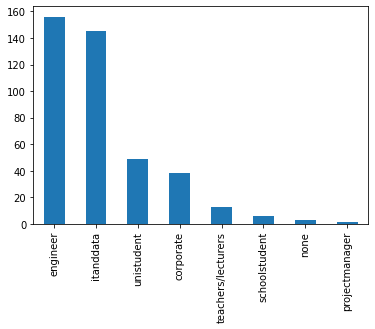

In [ ]:
occdat['กลุ่มอาชีพ'].value_counts().plot.bar()

###สรุปเรื่อง อาชีพ
- การแบ่งกลุ่มอัตโนมัติยังไม่ดีนัก จะเห็นได้ว่ากลุ่มไปกองอยู่ที่ engineer กับ itanddata เป็นหลัก
- อาจจะต้องแบ่งกลุ่มให้เยอะกว่านี้ หรืออาจจะต้องใช้คนมาช่วยแบ่งกลุ่มอาชีพ และใช้ supervise learning ที่จะได้เรียนในคราวถัดไป

##3.7 รวมข้อมูลเพื่อสร้าง DataMart

In [ ]:
datage = datage.reset_index()
pprofile = pprofile.reset_index()
expec = expec.reset_index()
studyreason = studyreason.reset_index()
occdat = occdat.reset_index()
datamart = pd.concat([datage[['อายุ']],pprofile[['prog_clus']],expec[['eclus']],studyreason[['rclus']],occdat[['กลุ่มอาชีพ']]],axis=1)
datamart

,อายุ,prog_clus,eclus,rclus,กลุ่มอาชีพ
0,20-30,p_frontend,expect_experience,reason_interested,itanddata
1,>40,p_python,expect_apply,reason_extend,itanddata
2,20-30,p_python,expect_english,reason_motivated,unistudent
3,20-30,p_data,expect_experience,reason_interested,itanddata
4,30-40,p_python,expect_concept,reason_extend,corporate
5,<20,p_python,expect_concept,reason_extend,unistudent
6,20-30,p_noskill,expect_apply,reason_motivated,corporate
7,30-40,p_python,expect_concept,reason_motivated,itanddata
8,20-30,p_python,expect_apply,reason_motivated,unistudent
9,20-30,p_python,expect_experience,reason_motivated,unistudent


In [ ]:
dat.iloc[11]

Timestamp                                                                                                                             7/16/2020 16:53:12
สะดวกเรียนช่วงเวลาไหน                                                                                              จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00
อายุ                                                                                                                                          20 - 30 ปี
อาชีพ                                                                                                                                            Student
สถานที่ทำงาน/เรียน                                                                                                                สถาบันพัฒนบริหารศาสตร์
สาขาที่เรียนจบ / กำลังศึกษา                                                                                                             คณะสถิติประยุกต์
มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประ

# 4. การหาคำตอบจากข้อมูล

##4.1 ความคาดหวังของคนเรียน

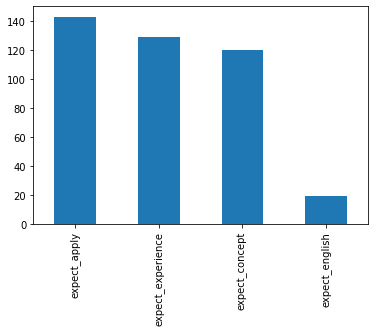

In [ ]:
datamart['eclus'].value_counts().plot.bar()

##4.2 เหตุผลที่เรียน

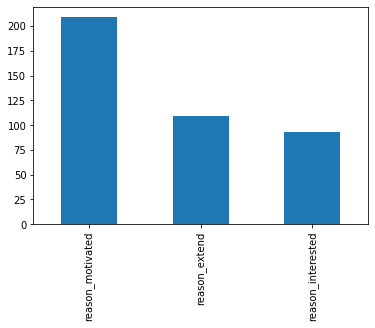

In [ ]:
datamart['rclus'].value_counts().plot.bar()

##4.3 พื้นฐานเขียนโปรแกรม

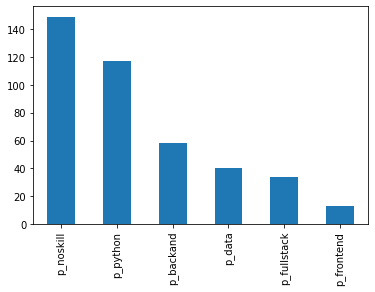

In [ ]:
datamart['prog_clus'].value_counts().plot.bar()

##4.4 ช่วงอายุคนเรียน

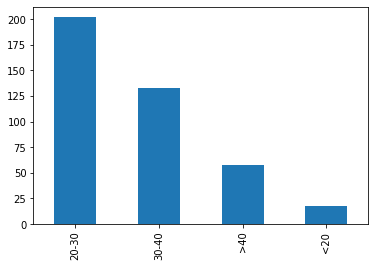

In [ ]:
datamart['อายุ'].value_counts().plot.bar()

##4.5 อาชีพ

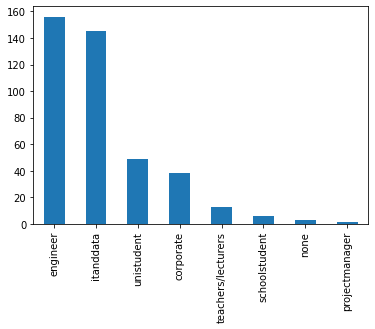

In [ ]:
datamart['กลุ่มอาชีพ'].value_counts().plot.bar()

##สรุป ความสำคัญของการสร้าง data mart
- หากข้อมูลเรามีการอัพเดท เราก็สามารถวิเคราะห์ข้อมูล เทรนใหม่ ได้อย่างรวดเร็ว
- สามารถไปสร้าง dashboard ที่เป็น real-time ก็ได้
- หัวใจของ data analytic อยู่ที่ data mart ทำได้ครบถ้วน แค่ไหน

# 5. ชุดคำถามใหม่หลังจากเห็นผลลัพธ์แรก

In [ ]:
pd.crosstab(datamart['eclus'],datamart['prog_clus'])

prog_clus,p_backand,p_data,p_frontend,p_fullstack,p_noskill,p_python
eclus,,,,,,
expect_apply,30,11,5,10,48,39
expect_concept,14,11,3,11,38,43
expect_english,1,1,0,2,9,6
expect_experience,13,17,5,11,54,29


In [ ]:
pd.crosstab(datamart['eclus'],datamart['prog_clus'],normalize=0).drop('expect_english')


prog_clus,p_backand,p_data,p_frontend,p_fullstack,p_noskill,p_python
eclus,,,,,,
expect_apply,0.209790,0.076923,0.034965,0.069930,0.335664,0.272727
expect_concept,0.116667,0.091667,0.025000,0.091667,0.316667,0.358333
expect_experience,0.100775,0.131783,0.038760,0.085271,0.418605,0.224806


In [ ]:
pd.crosstab(datamart['eclus'],datamart['prog_clus'],normalize=1).drop('expect_english')

prog_clus,p_backand,p_data,p_frontend,p_fullstack,p_noskill,p_python
eclus,,,,,,
expect_apply,0.517241,0.275,0.384615,0.294118,0.322148,0.333333
expect_concept,0.241379,0.275,0.230769,0.323529,0.255034,0.367521
expect_experience,0.224138,0.425,0.384615,0.323529,0.362416,0.247863


In [ ]:
pd.crosstab(datamart['อายุ'],datamart['prog_clus'])

prog_clus,p_backand,p_data,p_frontend,p_fullstack,p_noskill,p_python
อายุ,,,,,,
20-30,27,19,8,18,67,63
30-40,24,14,3,12,44,36
<20,2,0,0,2,4,10
>40,5,7,2,2,34,8


In [ ]:
pd.crosstab(datamart['อายุ'],datamart['prog_clus'],normalize=1) #ไม่มีประโยชน์ เพราะ 20-30 คนสมัครเยอะ

prog_clus,p_backand,p_data,p_frontend,p_fullstack,p_noskill,p_python
อายุ,,,,,,
20-30,0.465517,0.475,0.615385,0.529412,0.449664,0.538462
30-40,0.413793,0.350,0.230769,0.352941,0.295302,0.307692
<20,0.034483,0.000,0.000000,0.058824,0.026846,0.085470
>40,0.086207,0.175,0.153846,0.058824,0.228188,0.068376


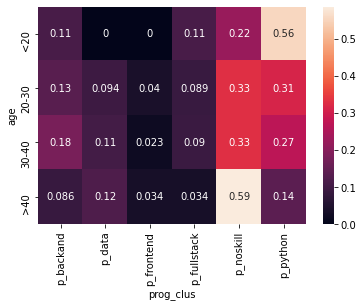

In [ ]:
datamart['age'] = datamart['อายุ']
ageXprog = pd.crosstab(datamart['age'],datamart['prog_clus'],normalize=0)
ageXprog = ageXprog.T[['<20','20-30','30-40','>40']].T
sns.heatmap(ageXprog, annot=True)

###สรุปผล อายุเทียบกับความสามารถในการเขียนโปรแกรม
- ยิ่งอายุน้อยยิ่งเขียน python ได้ สอดคล้องกับการที่ภาษา python เป็นภาษาที่กำลังเป็นที่นิยม และคนรุ่นใหม่มีโอกาสได้เรียน แต่อยากที่จะได้ฟังประสบการณ์ทำงานในสาย Data Science
- เห็นได้ว่า มีก้อนแบ่งระหว่างคนรู้จัก python กับคนเขียนโปรแกรมไม่ได้ เป็นเรื่องดี ที่จะช่วยในการแบ่งกลุ่มให้เท่า ๆ กัน
- มีผู้ใหญ่ที่อายุมากกว่า 40 ที่เขียนโปรแกรมไม่ได้ คาดว่า น่าจะเป็นกลุ่มผู้บริหาร หรือเจ้าของกิจการ ที่อาจจะสนใจและมีแนวโน้มที่จะจ้างคนรุ่นใหม่ในสาย data ไปช่วย

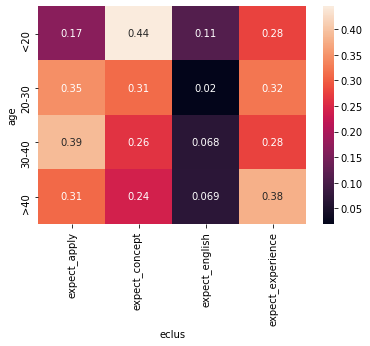

In [ ]:
pd.crosstab(datamart['กลุ่มอาชีพ'],datamart['prog_clus'],normalize=1)
ageXexpe = pd.crosstab(datamart['age'],datamart['eclus'],normalize=0)
ageXexpe = ageXexpe.T[['<20','20-30','30-40','>40']].T
sns.heatmap(ageXexpe, annot=True)

###สรุปผล อายุเทียบกับความคาดหวัง
- ยิ่งอายุน้อยยิ่งต้องการไอเดีย concept ผู้ใหญ่น่าจะเข้าใจ concept ได้ดีกว่า แต่อยากที่จะได้ฟังประสบการณ์ทำงานในสาย Data Science
- การประยุกต์ใช้งาน จะเป็นกลุ่มวัยคนทำงาน

# 6. สรุป
- data analytic มีความสำคัญอย่างมากในการหา insight เพื่อตอบคำถามทางธุรกิจเบื้องต้น
- ข้อจำกัดของ data analytic คือ การโต้ตอบกับมนุษย์ที่มองเห็นได้มากที่สุดเพียง 3 มิติเท่านั้น 
- เราจะใช้ data science ในการเข้าใจ data ที่เหนือกว่า 3 มิติ รวมถึงการสร้าง AI เพิ่มทำนายผลทางธุรกิจ



---



#backup

In [ ]:
# Concatenate original dataframe with datamart
dat = pd.concat([dat,mydatamart], axis=1)
dat.head()

,Timestamp,สะดวกเรียนช่วงเวลาไหน,อายุ,อาชีพ,สถานที่ทำงาน/เรียน,สาขาที่เรียนจบ / กำลังศึกษา,มีพื้นฐานการเขียนโปรแกรมคอมพิวเตอร์หรือไม่ หากมีโปรดให้ข้อมูล อาทิ ภาษาที่ถนัด ประสบการณ์ในการเขียน,ได้ผ่านการเรียนคลาสอื่น ๆ ของ BOTNOI มาก่อนหรือไม่ ถ้าเคยเรียนคลาสไหนมา,ทำไมถึงสนใจสมัครเรียน,ความคาดหวังจากการมาเรียน,กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน,,ยืนยันลงทะเบียน,ชำระเงิน,15 - 20 ปี,20 - 30 ปี,30 - 40 ปี,40 ปี ขึ้นไป,pythonskill,noprogramingskill,programingskill
0,7/16/2020 14:11:33,"จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00, เสาร์ แ...",20 - 30 ปี,Web programmer,กำลังจะศึกษา ป โท ด้าน recommendation system,Computer engineering,C# html jquery javascript etc.,,ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendati...,ทำระบบ recommendation system ได้ และต่อยอดในด้...,,,Ud4eea8c87626fed0f82a01ccd738d5be,1,0,1,0,0,False,False,True
1,7/16/2020 14:14:51,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,40 ปี ขึ้นไป,IT System admin,Non-Corp,Electrical Engineer,"C , Python",Python Fundamental for Data Science module 1,สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้,ประยุกต์กับชีวิตและการทำงานได้ การตัดสินใจมีพื...,,,Ue3c819f721bf05b5d6dfbdebbcde1173,1,0,0,0,1,True,False,True
2,7/16/2020 14:30:50,จันทร์ ถึง ศุกร์ เวลา 18:00 ถึง 21:00,20 - 30 ปี,นักศึกษา,จุฬาฯ,วิศวกรรมอุตสาหการ,python,,หาความรู้เพิ่มเติม,Case study / real world application,,,U1bc99db21c65b792d64d8f4d3545242b,1,0,1,0,0,True,False,True
3,7/16/2020 14:36:17,"จันทร์ ถึง ศุกร์ เวลา 10:00 ถึง 18:00, จันทร์ ...",20 - 30 ปี,ว่างงาน (พักเบรก) แต่เคยทำงานในบริษัทวิจัยการตลาด,ว่างงาน (ที่ทำงานล่าสุด คือ CREAM Consulting),Master of Arts in Business and Managerial Econ...,Excel : การเขียนสูตรระดับน่าจะประมาณ Intermedi...,Python Fundamental for Data Science module 1,เราสนใจด้าน Behavioral Science ค่ะ \n\nเคยทำงา...,- เขียน Program ได้ดียิ่งขึ้น + รู้ว่า ณ Stage...,,,U74c91c5612f92779b894338553faced7,1,0,1,0,0,True,False,True
4,7/16/2020 14:50:25,เสาร์ และ อาทิตย์ 09:00 ถึง 12:00,30 - 40 ปี,ผู้ดูแลจัดการระบบโรงงาน,บริษัทแสงอินเตอร์ลามเนทจำกัด,Information and Communication Engineer,"มี Javascript, Python",,อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บ...,เข้าใจหลักการ Data science มากขึ้น คิด Analyti...,,,U0f486dda4e1d90b73ef233e186528ebe,1,0,0,1,0,True,False,True


Gender

In [ ]:
def getGender(text):
  if 'คะ' in text or 'ค่ะ' in text:
    return 'Female'
  return 'Male'
  
dat['Gender'] = dat['ทำไมถึงสนใจสมัครเรียน'].apply(lambda x: getGender(x))

In [ ]:
dat['Gender'].value_counts()

Male      388
Female     23
Name: Gender, dtype: int64

คนที่อยากเปลี่ยนสายงาน

In [ ]:
def wantToChangeCareer(text):
  if 'เปลี่ยนสาย' in text or 'หางาน' in text or 'สนใจ' in text:
    return True
  return False
  
dat['CarrierChange'] = dat['ทำไมถึงสนใจสมัครเรียน'].apply(lambda x: wantToChangeCareer(x))

In [ ]:
dat['CarrierChange'].value_counts()

False    254
True     157
Name: CarrierChange, dtype: int64

ได้ข่าวผ่านช่องทางไหน

In [ ]:
def getChannel(text):
  line = ['line', 'botnoi', 'ไลน์', 'บอทน้อย']
  facebook = ['facebook', 'เฟส', 'fb', 'datarockie']
  twitter = ['twitter']

  if any(word in text.lower() for word in line):
    return 'Line'
  elif any(word in text.lower() for word in facebook):
    return 'Fackbook'
  elif any(word in text.lower() for word in twitter):
    return 'Twitter'
  else: 
    return 'N/A'

dat['Channel'] = dat['กรุณาช่วยระบุว่าได้รับข่าวคลาสเรียนบอทน้อยจากไหน'].apply(lambda x: getChannel(x))
dat['Channel']

0           N/A
1           N/A
2           N/A
3           N/A
4           N/A
         ...   
740    Fackbook
741    Fackbook
743    Fackbook
745    Fackbook
747    Fackbook
Name: Channel, Length: 411, dtype: object

In [ ]:
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Pgm51dYB6KfMJGVRseeemh3RR3HJ5bg79mL-lG8hPnU/edit?usp=sharing')

# การวิเคราะห์สำหรับการลงทะเบียน

##รู้ข่าวห้องเรียน Botnoi ผ่านช่องทางไหน

          Channel
Line          173
N/A           150
Fackbook       85
Twitter         3


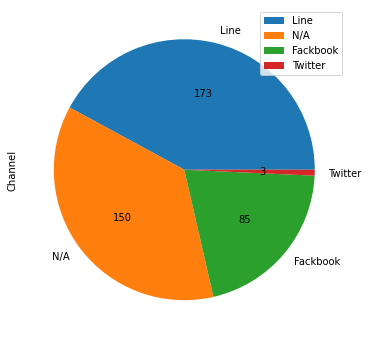

In [ ]:
Channel = pd.DataFrame(dat['Channel'].value_counts())
print(Channel)

i = [0]

def absolute_value(val):
    a  = Channel.iloc[i[0]%len(Channel), i[0]//len(Channel)]
    i[0] += 1
    return a

Channel.plot.pie(subplots=True, figsize=(12, 6), autopct=absolute_value);

##คนสมัครผ่านช่องทางไหน เวลาไหน

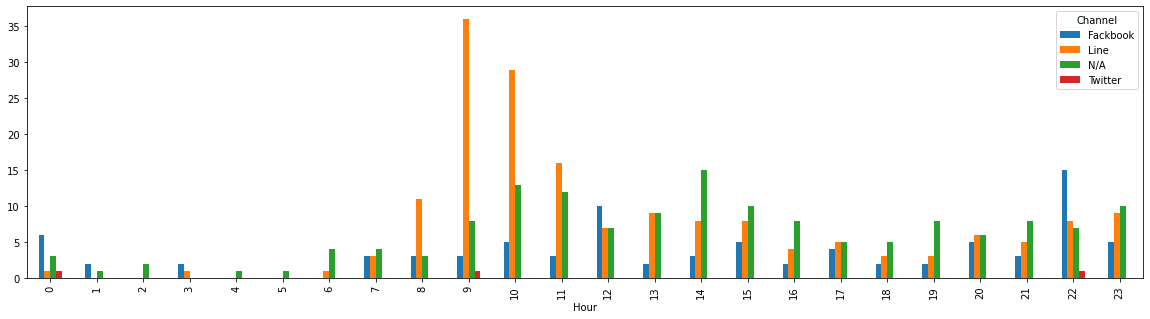

In [ ]:
dat[['Date','Time']] = dat['Timestamp'].apply(lambda x: pd.Series(x.split(' ')))
dat['Hour'] = dat.Time.apply(lambda x: x.split(':')[0]).astype(int) 
Channel_Time = pd.crosstab(dat.Hour,dat.Channel, dropna=False)
Channel_Time.plot.bar(figsize=(20,5))

##คนที่อยากมาทำงานด้าน Data Sci

       CarrierChange
False            254
True             157


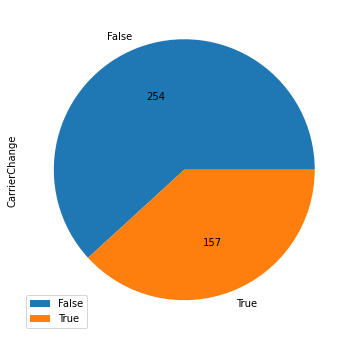

In [ ]:
CarrierChange = pd.DataFrame(dat['CarrierChange'].value_counts())
print(CarrierChange)

i = [0]

def absolute_value(val):
    a  = CarrierChange.iloc[i[0]%len(CarrierChange), i[0]//len(CarrierChange)]
    i[0] += 1
    return a

CarrierChange.plot.pie(subplots=True, figsize=(12, 6), autopct=absolute_value);

##กลุ่มไหนบ้างที่มีความสนใจอยากเปลี่ยนมาทำงานด้าน Data Sci

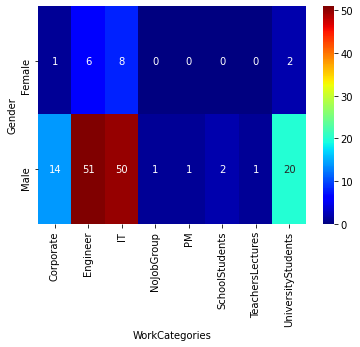

In [ ]:
WorkCategories_CarrierChange = dat['WorkCategories'].loc[dat['CarrierChange']==True]
sns.heatmap(pd.crosstab(dat['Gender'],WorkCategories_CarrierChange, dropna=False), \
            annot=True, fmt="g", cmap='jet')

##Info ทำไมถึงสนใจสมัครเรียน

In [ ]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
!gdown --id 1KFeMUzqRNkkOQ3m4oeoorkN4EJGe9JwF

Downloading...
From: https://drive.google.com/uc?id=1KFeMUzqRNkkOQ3m4oeoorkN4EJGe9JwF
To: /content/THSarabunNew Bold.ttf
100% 361k/361k [00:00<00:00, 51.5MB/s]


In [ ]:
textList = dat['ทำไมถึงสนใจสมัครเรียน']

textList = ' '.join(textList)
textList

'ต้องเรียนต่อ ป โทครับ และสนใจด้าน recommendation system สนใจเพราะต้องการปรับตัวให้เข้ากับอนาคตได้ หาความรู้เพิ่มเติม เราสนใจด้าน Behavioral Science ค่ะ \n\nเคยทำงานด้าน Market Research มาประมาณ  6-7 ปี ซึ่งเป็นการอยู่กับข้อมูลที่เก็บจากแบบสอบถาม ไม่ใช้ข้อมูลจริง\n\nอยากเปลี่ยนสายงานมาทาง Data Analyst หรือ Data Science มากขึ้น เพราะอยากลองทำงานกับ Data จริงมากขึ้น อยากศึกษาเพิ่มเติมการใช้งานข้อมูลที่โรงงานเก้บมาผ่าน Webservice ว่าเอาไปวิเคราะห์อะไรได้บ้าง สนใจDatascience อยากฝึกฝนตัวเองมาขึ้น อยากได้ลองร่วมทำงานกับพี่ๆที่ทำงานจริงค่ะ พัฒนาการทำงาน สนใจการทำsegmentation มีความสนใจในเรื่องของสถิติและ data science และได้ลองศึกษาจากการเรียนผ่านสื่อออนไลน์แล้วรู้สึกว่าเป็นงานที่น่าสนใจ จึงอยากเรียนรู้เพิ่มเติมกับทาง BOTNOI เพราะต้องการเรียนกับผู้ที่มีประสบการณ์ทำงานในประเทศและลองปฏิบัติจริงเพื่อให้สิ่งที่เรียนมาเป็นรูปธรรมมากขึ้นและเป็นแนวทางในการเลือกสายงานหลังเรียนจบ เดิมพอจะมีพื้นฐานด้านสถิติ และทฤษฎีด้าน machine learning บ้างแล้ว แต่ไม่ค่อยได้ทำProject เนื่องจากไม่ค่อยมั่นใจในขั้นตอน หร

(-0.5, 1276.5, 749.5, -0.5)

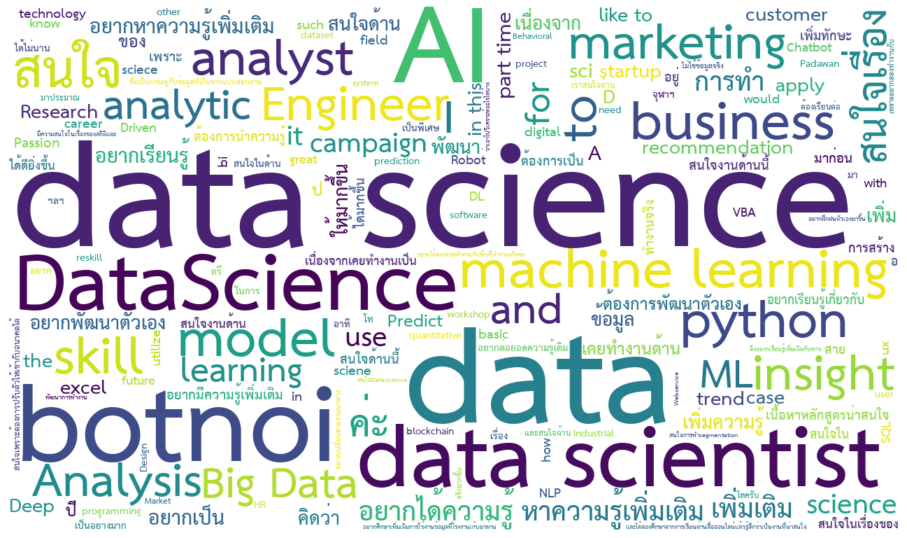

In [ ]:
path = '/content/THSarabunNew Bold.ttf'
stopwords = ["และ","เช่น","ครับ","หรือ","ๆ","อยู่แล้ว","มากขึ้น","ต่างๆ","ได้","ณ","คะ","ด้าน","เป็น","หา","กับ","ด้วย"]

wordcloud = WordCloud(font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=10,
                      background_color="white",
                      width=1277,
                      height=750,
                      regexp=r"[ก-๙a-zA-Z']+",
                      stopwords=stopwords,
                      random_state=1).generate(textList)
plt.figure(figsize = (16, 16))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")